# Find the period when the function is a 2 to 1 function or 1-1 function. 

|domain I|range f(x)|
|-|-|
|00|10|
|01|01|
|10|01|
|11|10|

The period we are looking for f(x) = f(x+b) is 11. The number on the right, value it equals to is not important.

|f(x)|f(x+b)|value|
|-|-|-|
|00|11|10|
|01|10|01|


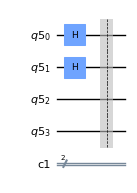

In [6]:
# Generating an oracle from the truth table.
from qiskit import *
from qiskit import IBMQ
from qiskit.visualization import *

N = 2

qr = QuantumRegister(2*N)
cr = ClassicalRegister(N)

QC = QuantumCircuit(qr, cr)

for i in range(N):
    QC.h(i)

QC.draw(output="mpl", scale=0.5)

QC.barrier()
QC.draw(output="mpl", scale=0.5)


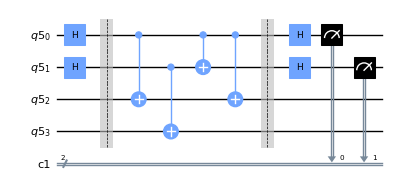

In [7]:
#2 Blackbox
# Copy the contents of the first register to second register.

for i in range(N):
    QC.cx(i, i+N)

QC.cx(0, 1)
QC.cx(0, 2)

QC.barrier()

# Step 4 apply Hadamard gates to the first register
for i in range(N):
    QC.h(qr[i])
    
# Step 5 perform measurement on the first register
for i in range(N):
    QC.measure(qr[i], cr[i])

QC.draw(output="mpl", scale=0.5)

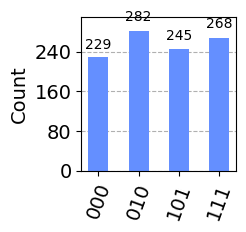

In [48]:
# use local simulator
backend = BasicAer.get_backend("qasm_simulator")
# the number of shots is twice the length of the bitstring
shots = 1024
job = execute(QC, backend=backend, shots=shots)
answer = job.result().get_counts()

plot_histogram(answer, figsize=(2,2))

In [49]:
lAnswer = [ (k[::-1],v) for k,v in answer.items() if k != "0"*N  ] #excluding the trivial all-zero
#Sort the basis by their probabilities
lAnswer.sort(key = lambda x: x[1], reverse=True)

Y = []
for k, v in lAnswer:
    Y.append( [ int(c) for c in k ] )


#import tools from sympy
from sympy import Matrix, pprint, MatrixSymbol, expand, mod_inverse


Y = Matrix(Y)

#pprint(Y)

#Perform Gaussian elimination on Y
Y_transformed = Y.rref(iszerofunc=lambda x: x % 2==0) # linear algebra on GF(2) 

#to convert rational and negatives in rref of linear algebra on GF(2)
def mod(x,modulus):
    numer, denom = x.as_numer_denom()
    return numer*mod_inverse(denom,modulus) % modulus

Y_new = Y_transformed[0].applyfunc(lambda x: mod(x,2)) #must takecare of negatives and fractional values
#pprint(Y_new)

print("The hidden bistring s[ 0 ], s[ 1 ]....s[",N-1,"] is the one satisfying the following system of linear equations:")
rows, cols = Y_new.shape
for r in range(rows):
    Yr = [ "s[ "+str(i)+" ]" for i, v in enumerate(list(Y_new[r,:])) if v == 1 ]
    if len(Yr) > 0:
        tStr = " + ".join(Yr)
        print(tStr, "= 0")

The hidden bistring s[ 0 ], s[ 1 ]....s[ 2 ] is the one satisfying the following system of linear equations:
s[ 0 ] + s[ 2 ] = 0
s[ 1 ] = 0


If s[0] + s[1] = 0 then both are 0's or both are 1's 

Hence the string is '11'